## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [5]:
x_i = np.linspace( 0 , 20 )
a =  -1 
b = 2

y_i = (a * x_i) + b

In [6]:
print(len(x_i))
print(len(y_i))

50
50


### Plot your data points. 

Text(0, 0.5, 'Y')

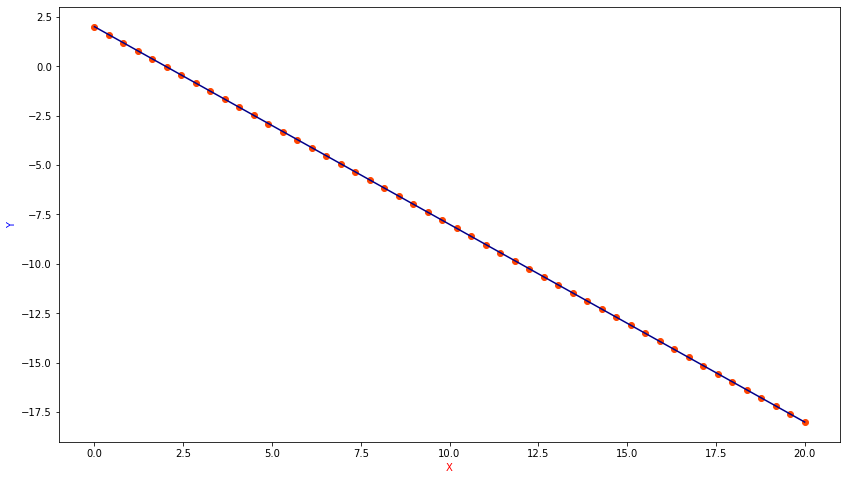

In [9]:
fig = plt.figure(figsize =( 14 , 8))
fig1 = fig.add_subplot(111)
fig1.scatter(x_i , y_i , color = 'orangered')
plt.plot(x_i , y_i , color = 'darkblue')
plt.xlabel("X" , color = 'r')
plt.ylabel("Y" , color = 'b')

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [42]:
def GD(x_i,y_i,alpha,iterations):
    theta0= 0
    theta1= 0
    loss=[]
    all_theta0 =[]
    all_theta1 =[]
    allhypo = []
        
    for i in range(iterations):
        
        hypo = theta0 + theta1 * x_i
        allhypo.append(hypo)
        
        all_theta0.append(theta0)
        all_theta1.append(theta1)
        
        cost = (sum(hypo - y_i)**2) / (2*len(x_i))
        loss.append(cost)
        
        
        dy =  np.sum(hypo - y_i) / (len(x_i))
        dx =  np.sum((hypo - y_i)* x_i) / (len(x_i))
        
        theta0 = theta0 - alpha * dy
        theta1 = theta1 - alpha * dx
        
        optimum_theta0 = theta0
        optimum_theta1 = theta1
        
        
        if (cost < 0.0001):
            print(f"We stopped at iteraion no. {i}")
            break

    return all_theta0,all_theta1, loss , allhypo ,optimum_theta0,optimum_theta1,hypo
        
        
        

In [47]:
all_theta0,all_theta1, loss , allhypo ,optimum_theta0,optimum_theta1,hypo = GD(x_i , y_i , 0.011 , 10000)

We stopped at iteraion no. 1977


In [48]:
r2_score(hypo , y_i)

0.99999954852234

## PLOT LOSS vs EPOCHS

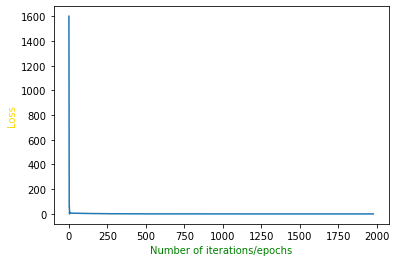

In [49]:
plt.plot(loss)
plt.xlabel("Number of iterations/epochs" , color = 'green')
plt.ylabel("Loss" , color = 'gold');

## PLOT LOSS vs THETA 0

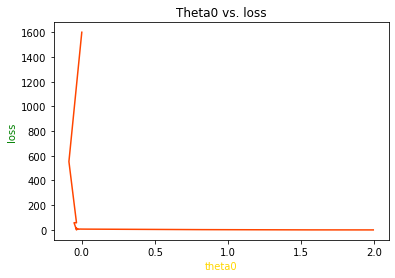

In [50]:
plt.plot(all_theta0, loss , color = 'orangered')
plt.xlabel('theta0' , color = 'gold')
plt.ylabel('loss' , color = 'green')
plt.title('Theta0 vs. loss')
plt.show()

## PLOT LOSS VS THETA 1

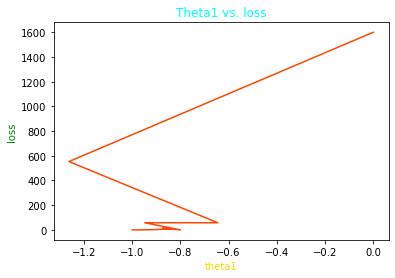

In [51]:
plt.plot(all_theta1, loss , color = 'orangered')
plt.xlabel('theta1' , color = 'gold')
plt.ylabel('loss' , color = 'green')
plt.title('Theta1 vs. loss' , color = 'cyan' )
plt.show()

## Plot all regression lines till converge

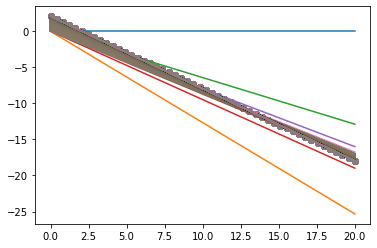

In [52]:
for i in range(len(allhypo)):
    plt.plot(x_i,allhypo[i])
    plt.scatter(x_i,y_i)
plt.show()
            

## Plot the best regression line

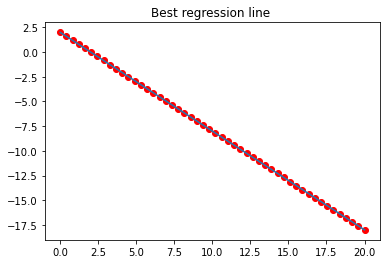

In [53]:
plt.scatter(x_i,y_i,color="red")
plt.plot(x_i,hypo)
plt.title('Best regression line ')
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

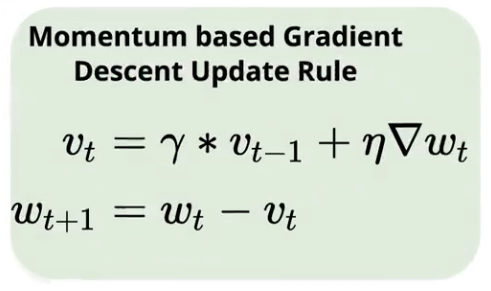

#### γ takes values between 0 and 1.
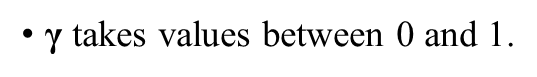

In [88]:
def Momentum_GD(x_i,y_i,alpha,max_iter,gama):
    theta_0=0
    theta_1=0.5
    a=alpha
    all_thetas0=[]
    all_thetas1=[]
    equi_cost=[]
    allhypo = []
    vt_theta0=0
    vt_theta1=0
    
    
    hyp=theta_0+(theta_1*x_i)
    m=len(x_i)
    cost_fun=(1/(2*m))*(((hyp-y_i)**2).sum())
    grad_Theta0=(1/m)*((hyp-y_i).sum())
    grad_Theta1=(1/m)*(((hyp-y_i)*x_i).sum())
    theta_0=theta_0-((a/m)*((hyp-y_i).sum()))
    theta_1=theta_1-((a/m)*(((hyp-y_i)*x_i).sum()))

    iteration=1
    gradient_change = [grad_Theta0,grad_Theta1]
    cost_fun_new=cost_fun
    norm=np.linalg.norm(np.array(grad_Theta0,grad_Theta1))

    
    while(iteration<max_iter and cost_fun_new-cost_fun<0.001 and norm>0.0001):
        hyp=theta_0+(theta_1*x_i)
        cost_fun_new=(1/(2*m))*(((hyp-y_i)**2).sum())
        grad_Theta0=(1/m)*((hyp-y_i).sum())
        grad_Theta1=(1/m)*(((hyp-y_i)*x_i).sum())
        norm=np.linalg.norm(np.array(grad_Theta0,grad_Theta1))
        allhypo.append(hyp)
        vt_theta0=(gama*vt_theta0)+(a*grad_Theta0)
        theta_0=theta_0-vt_theta0
        
        vt_theta1=(gama*vt_theta1)+(a*grad_Theta1)
        theta_1=theta_1-vt_theta1
        
        equi_cost.append(cost_fun_new)
        all_thetas0.append(theta_0)
        all_thetas1.append(theta_1)
        iteration+=1
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.scatter(x_i,y_i,color="blue")
    plt.plot(x_i,hyp,color="orange")
    plt.show()
    print('Optimum Theta 0:{}'.format(all_thetas0[-1]))
    print('Optimum Theta 1:{}'.format(all_thetas1[-1]))
    return all_thetas0,all_thetas1,hyp,allhypo,equi_cost,all_thetas0[-1],all_thetas1[-1]

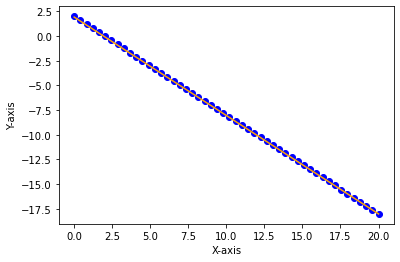

Optimum Theta 0:1.9188622195423208
Optimum Theta 1:-0.9939599886866697


In [127]:
thetas0,thetas1,hyp,allhypo,equiv_loss,opt_theta0,opt_theta1=Momentum_GD(x_i,y_i,0.01,100,0.9)

### CALCULATE R2

In [128]:
r2=r2_score(y_i,hyp)
print(r2)

0.999907400162188


## PLOT LOSS vs EPOCHS

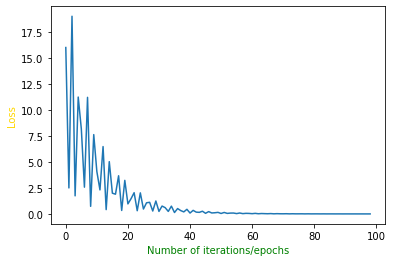

In [129]:
plt.plot(equiv_loss)
plt.xlabel("Number of iterations/epochs" , color = 'green')
plt.ylabel("Loss" , color = 'gold');

## PLOT THETA 0 vs LOSS

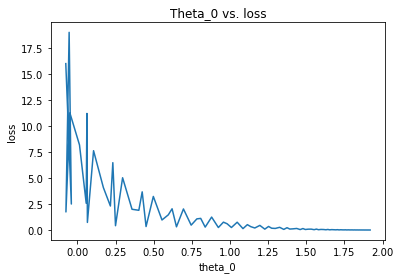

In [130]:
plt.plot(thetas0, equiv_loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

## PLOT THETA 1 vs LOSS

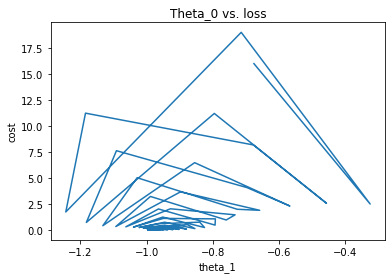

In [131]:
plt.plot(thetas1, equiv_loss)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

## Plot all regression till converge

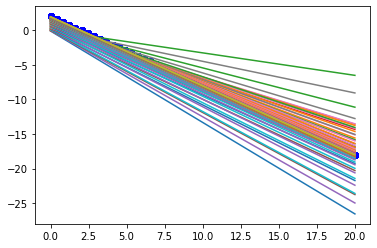

In [132]:
for i in range(len(allhypo)):
    plt.plot(x_i,allhypo[i])
    plt.scatter(x_i,y_i,color="blue")
plt.show()

## PLot the best regression line

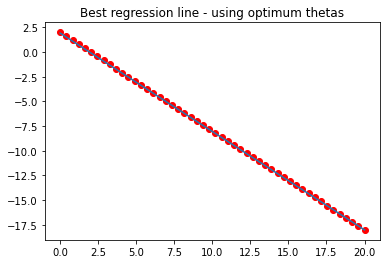

In [133]:
plt.scatter(x_i,y_i,color="red")
plt.plot(x_i,hyp)
plt.title('Best regression line - using optimum thetas')
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

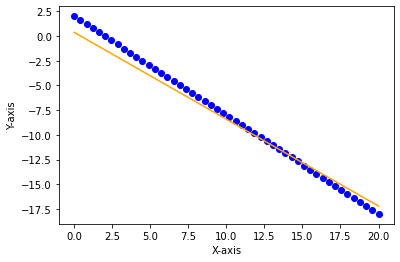

Optimum Theta 0:0.3751353893413813
Optimum Theta 1:-0.8791362532902092


In [135]:
thetas0,thetas1,hyp,allhypo,equiv_loss,opt_theta0,opt_theta1=Momentum_GD(x_i,y_i,0.01,100,0.00001)

In [136]:
r2=r2_score(y_i,hyp)
print(r2)

0.9802976099157743


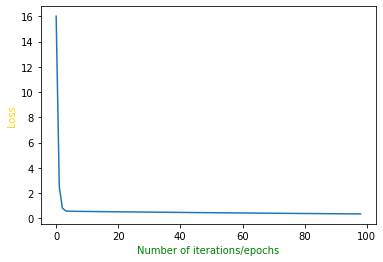

In [137]:
plt.plot(equiv_loss)
plt.xlabel("Number of iterations/epochs" , color = 'green')
plt.ylabel("Loss" , color = 'gold');

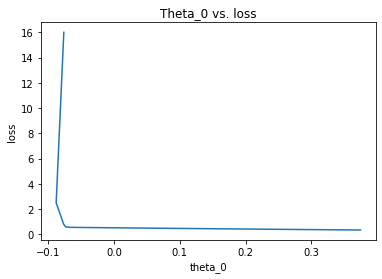

In [138]:
plt.plot(thetas0, equiv_loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

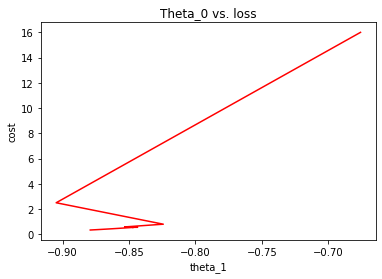

In [140]:
plt.plot(thetas1, equiv_loss , c = 'r')
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

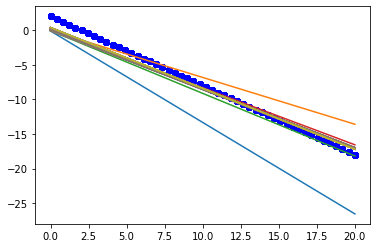

In [141]:
for i in range(len(allhypo)):
    plt.plot(x_i,allhypo[i])
    plt.scatter(x_i,y_i,color="blue")
plt.show()
            

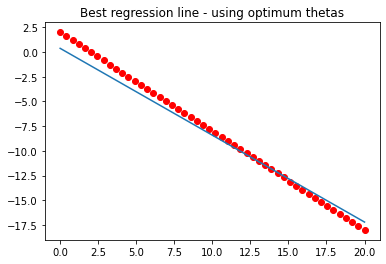

In [142]:
plt.scatter(x_i,y_i,color="red")
plt.plot(x_i,hyp)
plt.title('Best regression line - using optimum thetas')
plt.show()

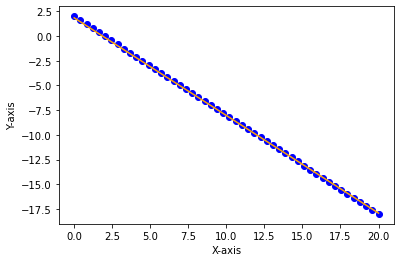

Optimum Theta 0:1.8384565245426656
Optimum Theta 1:-0.9879837682646184


In [143]:
thetas0,thetas1,hyp,allhypo,equiv_loss,opt_theta0,opt_theta1=Momentum_GD(x_i,y_i,0.01,1000,0)

In [144]:
r2=r2_score(y_i,hyp)
print(r2)

0.9998052563187035


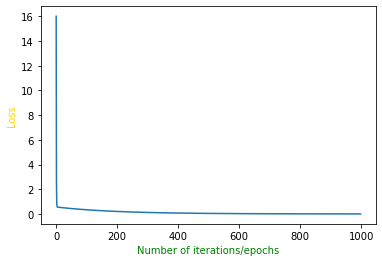

In [145]:
plt.plot(equiv_loss)
plt.xlabel("Number of iterations/epochs" , color = 'green')
plt.ylabel("Loss" , color = 'gold');

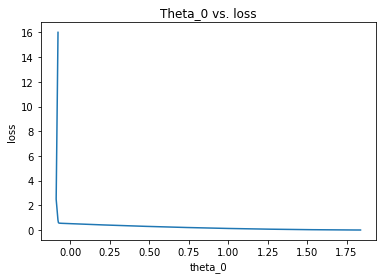

In [146]:
plt.plot(thetas0, equiv_loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

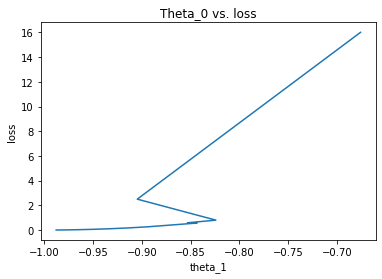

In [147]:
plt.plot(thetas1, equiv_loss)
plt.xlabel('theta_1')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

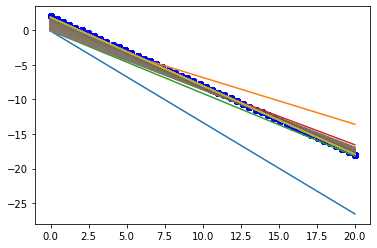

In [148]:
for i in range(len(allhypo)):
    plt.plot(x_i,allhypo[i])
    plt.scatter(x_i,y_i,color="blue")
plt.show()  

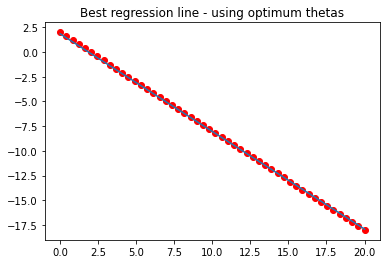

In [149]:
plt.scatter(x_i,y_i,color="red")
plt.plot(x_i,hyp)
plt.title('Best regression line - using optimum thetas')
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

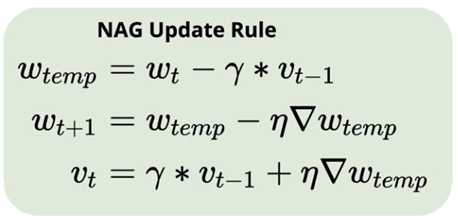

In [159]:
def NAG(x,y,alpha,max_iter,gama):
    theta_0=0
    theta_1=0.5
    a=alpha
    all_thetas0=[]
    all_thetas1=[]
    equi_cost=[]
    vt_theta0=0
    vt_theta1=0
    
    
    hyp=theta_0+(theta_1*x_i)
    m=len(x)
    cost_fun=(1/(2*m))*(((hyp-y_i)**2).sum())
    grad_Theta0=(1/m)*((hyp-y_i).sum())
    grad_Theta1=(1/m)*(((hyp-y_i)*x_i).sum())

    iteration=1
    gradient_change = [grad_Theta0,grad_Theta1]
    cost_fun_new=cost_fun
    norm=np.linalg.norm(np.array(grad_Theta0,grad_Theta1))
    
    while(iteration<max_iter and cost_fun_new-cost_fun<0.001 and norm>0.0001):
        
        theta_0=theta_0-(gama*vt_theta0)
        theta_1=theta_1-(gama*vt_theta1)
        
        hyp=theta_0+(theta_1*x_i)
        cost_fun_new=(1/(2*m))*(((hyp-y_i)**2).sum())
        grad_Theta0=(1/m)*((hyp-y_i).sum())
        grad_Theta1=(1/m)*(((hyp-y_i)*x_i).sum())
        norm=np.linalg.norm(np.array(grad_Theta0,grad_Theta1))
        
        
        theta_0=theta_0-(a*grad_Theta0)
        theta_1=theta_1-(a*grad_Theta1)
        
        vt_theta0=(gama*vt_theta0)+(a*grad_Theta0)
        vt_theta1=(gama*vt_theta1)+(a*grad_Theta1)
        
        
        equi_cost.append(cost_fun_new)
        all_thetas0.append(theta_0)
        all_thetas1.append(theta_1)
        iteration+=1
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.scatter(x,y,color="blue")
    plt.plot(x,hyp,color="red")
    plt.show()
    print("The cost Function is: "+ str(cost_fun_new))
    print('Optimum Theta 0:{}'.format(all_thetas0[-1]))
    print('Optimum Theta 1:{}'.format(all_thetas1[-1]))
    return all_thetas0,all_thetas1,hyp,equi_cost,all_thetas0[-1],all_thetas1[-1]

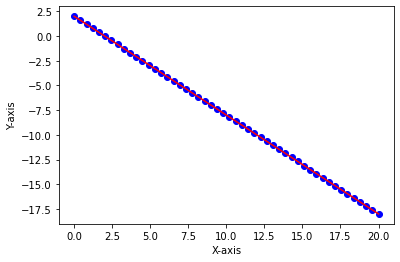

The cost Function is: 1.9608693732921653e-08
Optimum Theta 0:1.9996103121892197
Optimum Theta 1:-0.999971013505649


In [166]:
thetas0,thetas1,hypo,equiv_loss,opt_theta0,opt_theta1=NAG(x_i,y_i,0.0051,1000,0.9)

In [167]:
r2=r2_score(y_i,hypo)
print(r2)

0.9999999988696164


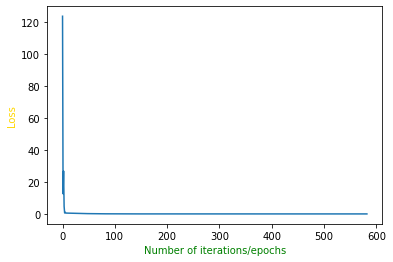

In [172]:
plt.plot(equiv_loss)
plt.xlabel("Number of iterations/epochs" , color = 'green')
plt.ylabel("Loss" , color = 'gold');

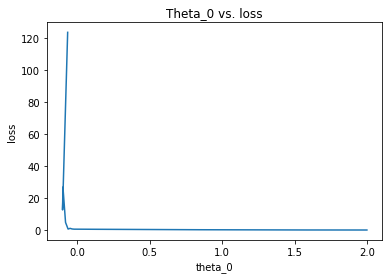

In [170]:
plt.plot(thetas0, equiv_loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

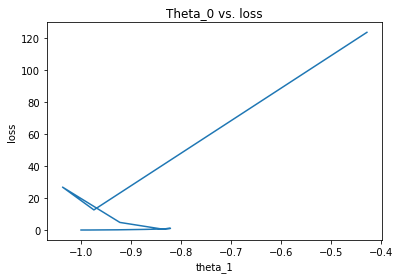

In [171]:
plt.plot(thetas1, equiv_loss)
plt.xlabel('theta_1')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

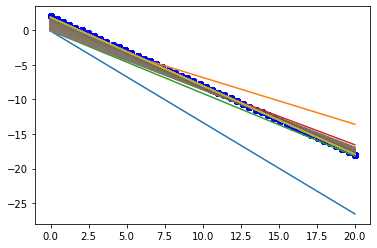

In [169]:
for i in range(len(allhypo)):
    plt.plot(x_i,allhypo[i])
    plt.scatter(x_i,y_i,color="blue")
plt.show()  

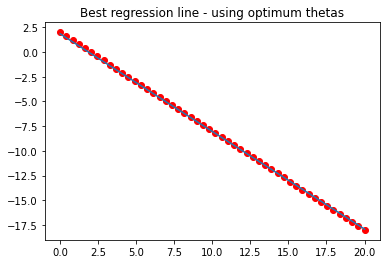

In [168]:
plt.scatter(x_i,y_i,color="red")
plt.plot(x_i,hyp)
plt.title('Best regression line - using optimum thetas')
plt.show()

## Congratulations 
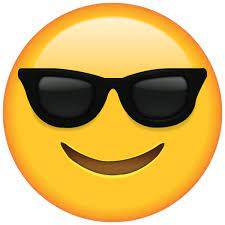